## **Dataset Content**

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.


**Thirteen features** were measured from each each **three types of wine**s:
* **Alcohol**
* **Malic acid**
* **Ash**
* **Alcalinity of ash**
* **Magnesium**
* **Total phenols**
* **Flavanoids**
* **Nonflavanoid phenols**
* **Proanthocyanins**
* **Color intensity**
* **Hue**
* **OD280/OD315 of diluted wines**
* **Proline**


In a classification context, this is a well posed problem with `"well behaved"` class structures. A good data set for first testing of a new classifier, but not very challenging.

### **What is a Feature in Machine Learning?**

**In machine learning and pattern recognition, a feature is an individual measurable property or characteristic of a phenomenon. Choosing informative, discriminating and independent features is a crucial element of effective algorithms in pattern recognition, classification and regression.**


## **Evaluation**

Using differents types od models we are gonna try to evaluate / classificate the data set of wines datas.

Originally used as an example data set on which Fisher's linear discriminant analysis was applied, it became a typical test case for many statistical classification techniques in machine learning such as support vector machines.

**In this project we will use this case for studies and learning purposes.**

## **Legend**

#### **target 0 refers to the wine classified as class_0** 

#### **target 1 refers to the wine classified as class_1**

#### **target 2 refers to the wine classified as class_2**


## **Data Set**
The dataset contains a set of 174 records under 14 attributes - `alcohol`,`malic_acid` ,	`ash`	, `alcalinity_of_ash` , 	`magnesium	total_phenols` ,	`flavanoids` ,	`nonflavanoid_phenols` ,	`proanthocyanins` ,	`color_intensity`, 	`hue` ,	`od280/od315_of_diluted_wines` and	`proline`

You can find the original data set in the Machine Learning package Scikit - Learn page.

In [2]:
# Regular EDA and Plotting Libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
from matplotlib.lines import Line2D

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [3]:
# load the wine dataset
from sklearn.datasets import load_wine
load_wine = load_wine()

In [4]:
def creating_dataframe():
  data = load_wine.data
  features_names = load_wine.feature_names
  target = load_wine.target

  wines = pd.DataFrame(data, columns = features_names)
  wines['target'] = target

  return wines

target_names = load_wine.target_names

In [37]:
# creating iris dataframe
wines = creating_dataframe()
wines.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [ ]:
# Checking for any Missing / NaN values
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

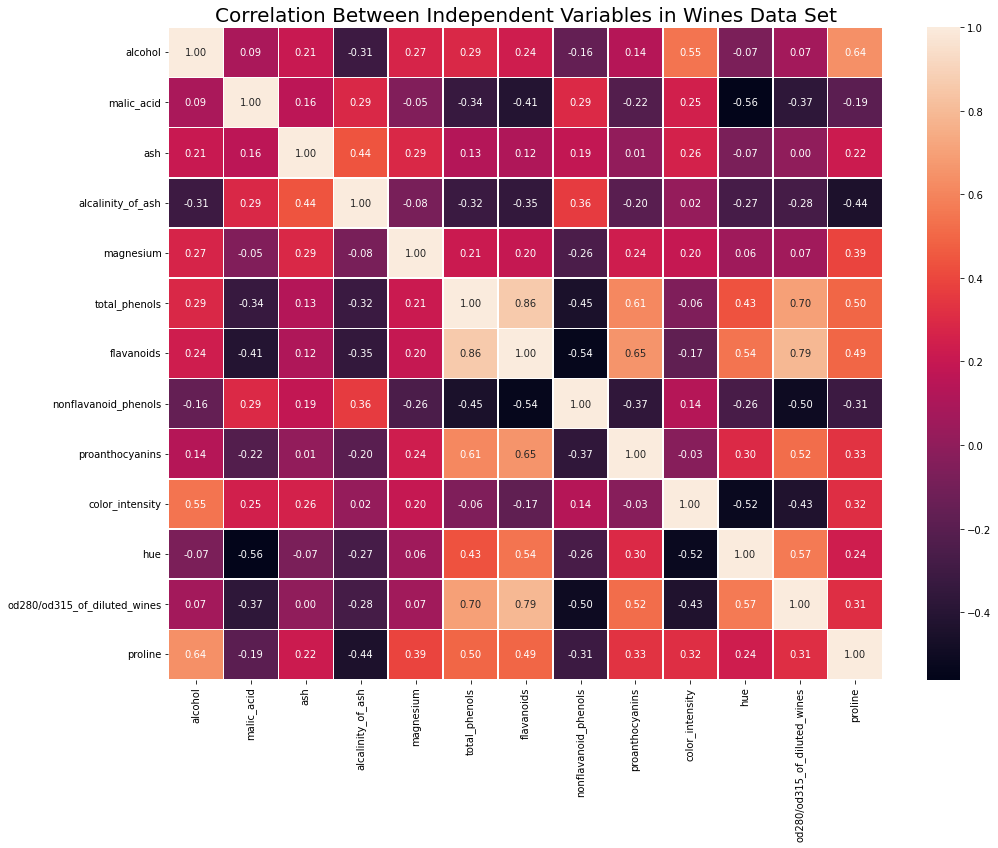

In [28]:
# Correlation between independent variables
'''
This may give an idea of which independent variables may or may not have an impact on our target variable.
'''
corr_matrix = wines.drop(['target'], axis = 1).corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True,  linewidths=0.5, fmt= ".2f");
plt.title('Correlation Between Independent Variables in Wines Data Set', fontsize=20);

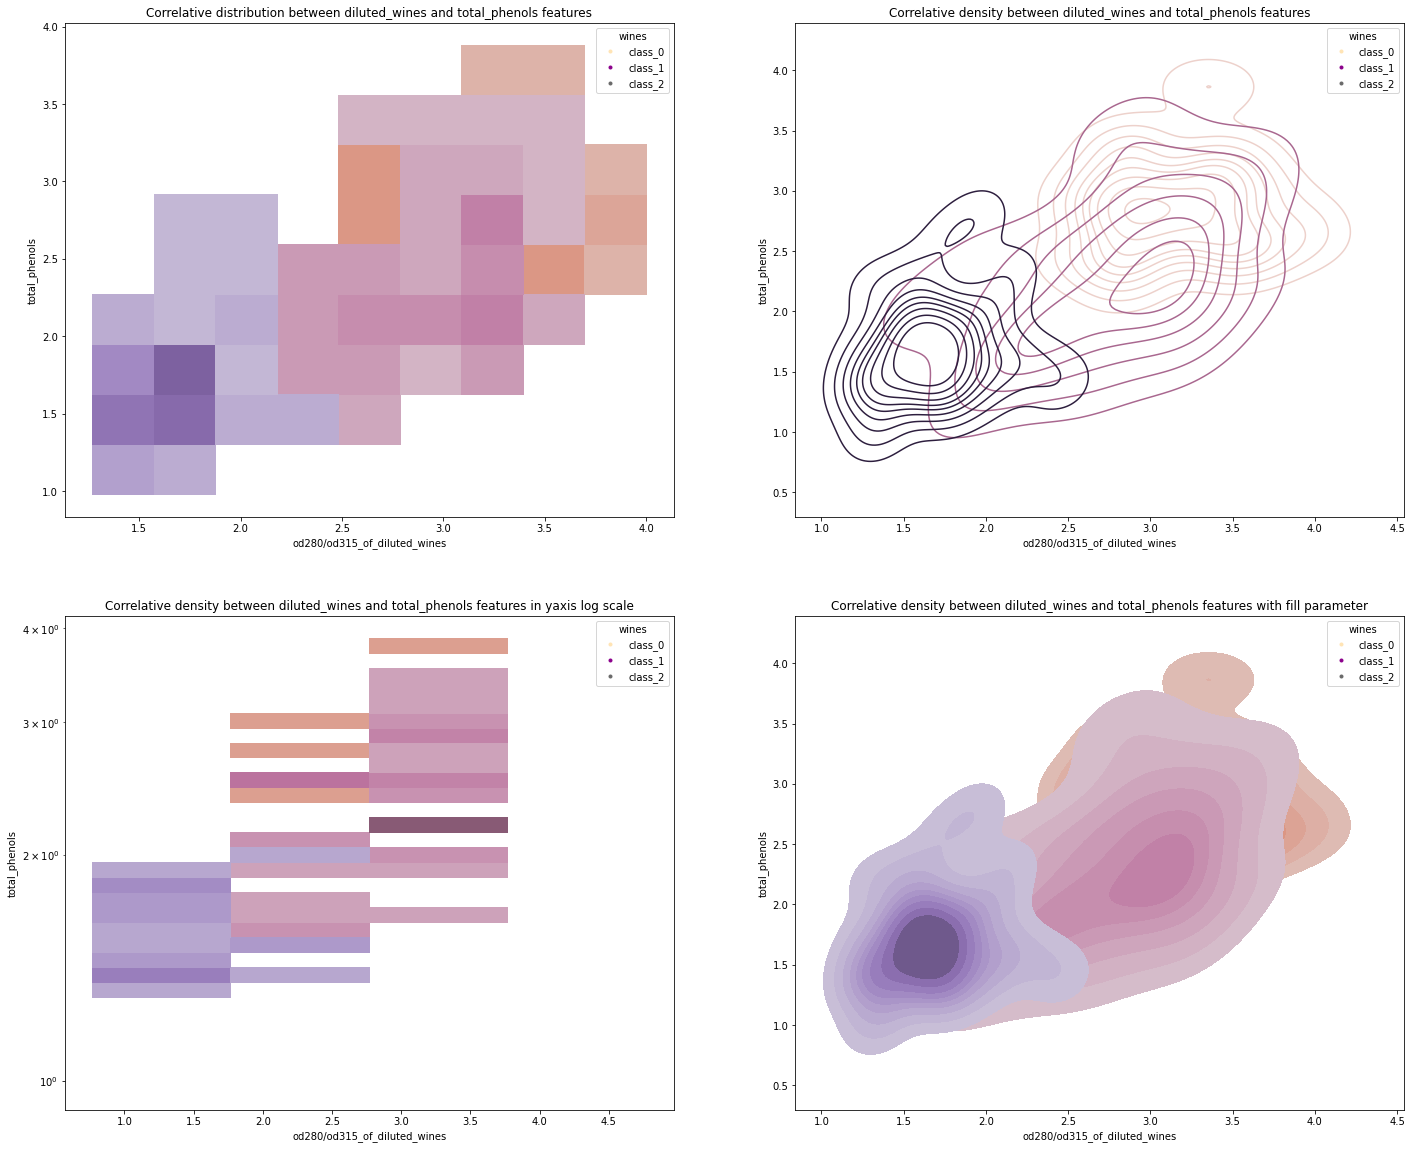

In [29]:
# checking od280/od315_of_diluted_wines and total_phenols correlation
fig, axs = plt.subplots(nrows = 2 , ncols = 2, figsize = (24,20))

custom = [Line2D([], [], marker='.', color='moccasin', linestyle='None'),
          Line2D([], [], marker='.', color='darkmagenta', linestyle='None'),
          Line2D([], [], marker='.', color='dimgray', linestyle='None')]

# Row 0 / Columns [0,1]
sns.histplot(data = wines, x = 'od280/od315_of_diluted_wines', y = 'total_phenols', hue = 'target', ax = axs[0][0]); 
axs[0][0].set(title = 'Correlative distribution between diluted_wines and total_phenols features')


sns.kdeplot(data = wines, x = 'od280/od315_of_diluted_wines', y = 'total_phenols', hue = 'target', ax = axs[0][1]); 
axs[0][1].set(title = 'Correlative density between diluted_wines and total_phenols features')

# Row 1 / Columns [0,1]
sns.histplot(data = wines, x = 'od280/od315_of_diluted_wines', y = 'total_phenols', hue = 'target', bins=30, discrete=(True, False), log_scale=(False, True),
    pthresh=.05, pmax=.9, ax = axs[1][0]); 
axs[1][0].set(title = 'Correlative density between diluted_wines and total_phenols features in yaxis log scale')

sns.kdeplot(data = wines, x = 'od280/od315_of_diluted_wines', y = 'total_phenols', hue = 'target', fill=True, ax = axs[1][1]); 
axs[1][1].set(title = 'Correlative density between diluted_wines and total_phenols features with fill parameter')



for row in range(2):
  for col in range(2):
    axs[row][col].legend(custom, ['class_0', 'class_1', 'class_2'], title = 'wines',loc = 'upper right');


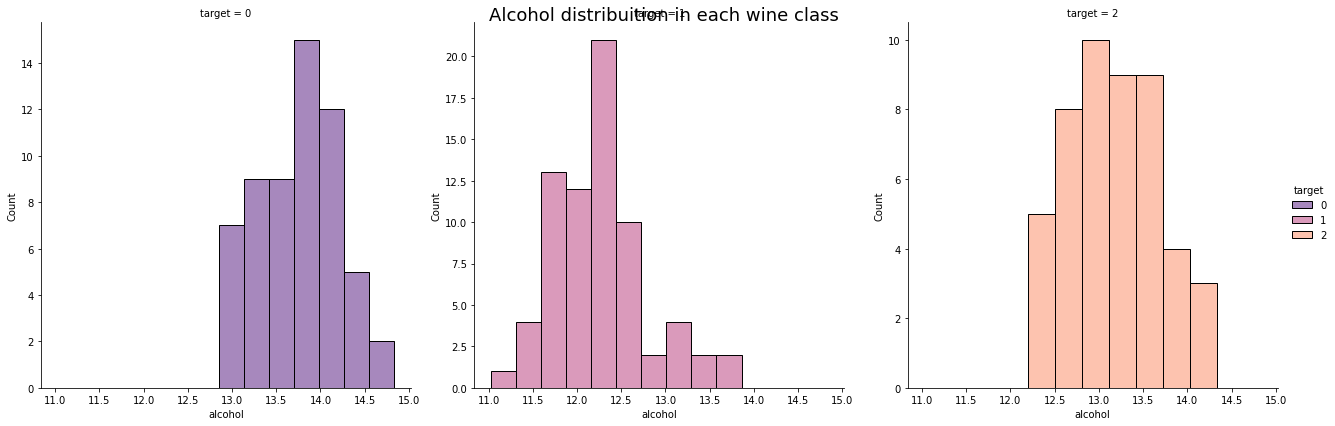

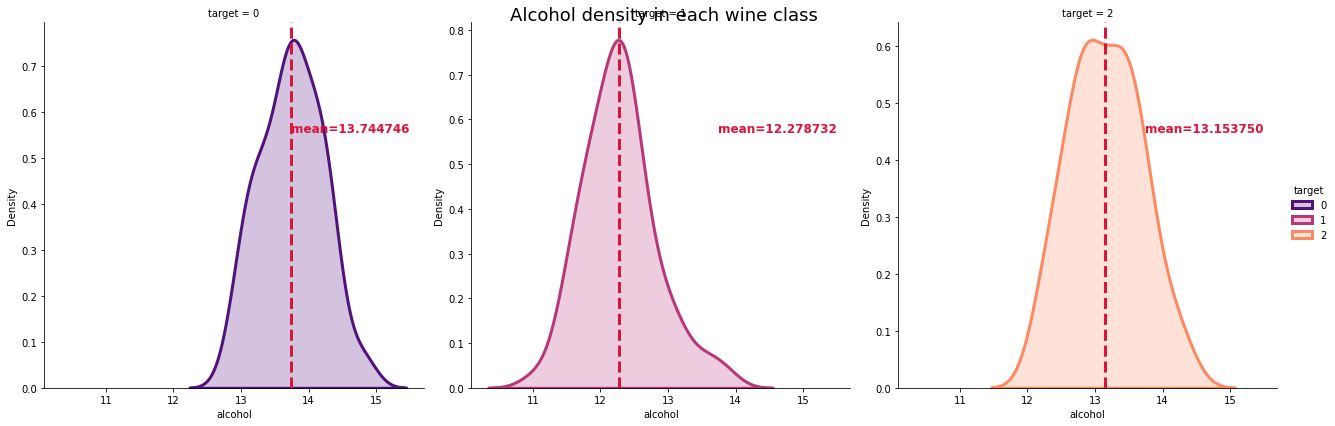

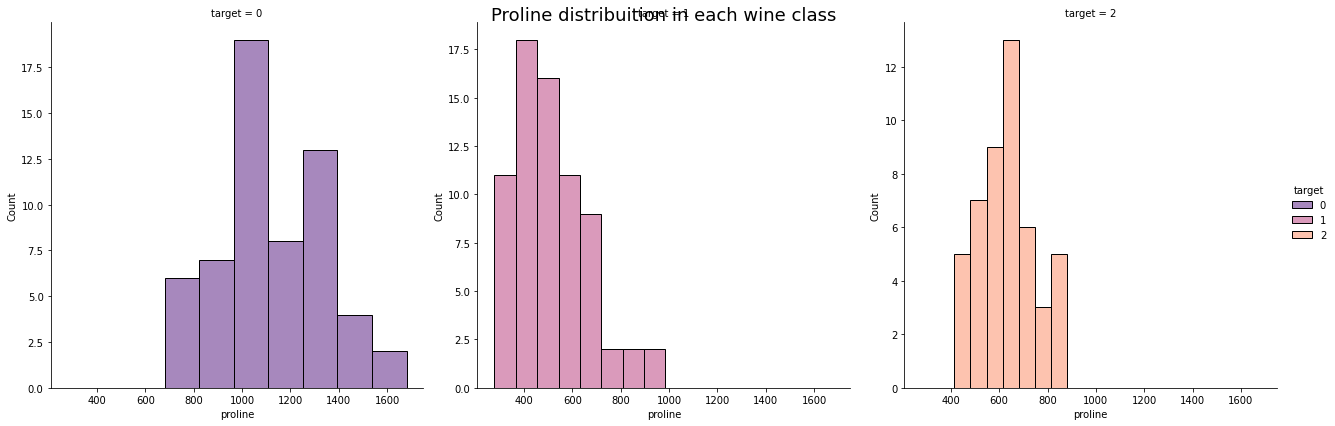

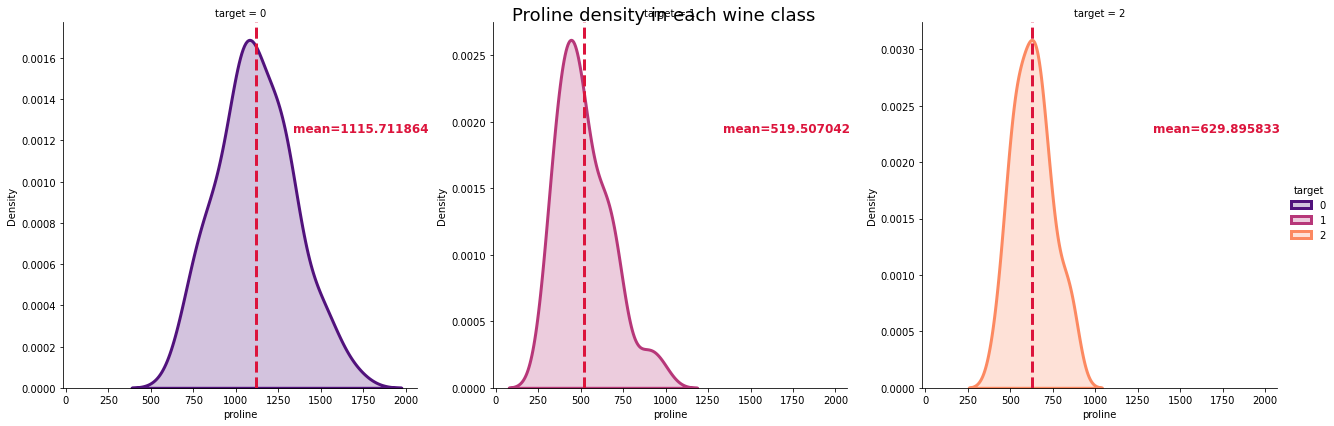

In [30]:
# checking how alcohol and proline features are distributed in the data set 
def add_mean_line(data, var = None, **kws):
  # if no variable provided skip adding mean line
  if not var: return

  # calculate mean for each group
  m = np.mean(data[var])

  # get current axis
  ax = plt.gca()

  # add line at group mean
  ax.axvline(m, color = 'crimson', lw=3, ls='--')

  # annotate group mean
  x_pos = 0.65
  if m > 5000: x_pos = 0.2
  ax.text(x_pos, 0.7, f'mean={m:0f}', transform = ax.transAxes, color = 'crimson', fontweight = 'bold', fontsize = 12)


s = sns.FacetGrid(wines , col="target", sharey = False , hue = 'target',  palette = 'magma',  height = 6);
s.map_dataframe(sns.histplot, x="alcohol", alpha=0.5)
s.fig.suptitle('Alcohol distribuition in each wine class', fontsize = 18)
s.add_legend();

quantity = 'alcohol'

g = sns.FacetGrid(wines , col="target", sharey = False , hue = 'target',  palette = 'magma', height = 6);
g.map_dataframe(sns.kdeplot, x=quantity, lw=3, shade = True)
g.map_dataframe(add_mean_line, var = quantity)
g.fig.suptitle('Alcohol density in each wine class', fontsize = 18)
g.add_legend();


s = sns.FacetGrid(wines , col="target", sharey = False , hue = 'target',  palette = 'magma',  height = 6);
s.map_dataframe(sns.histplot, x="proline", alpha=0.5)
s.fig.suptitle('Proline distribuition in each wine class', fontsize = 18)
s.add_legend();

quantity = 'proline'

g = sns.FacetGrid(wines , col="target", sharey = False , hue = 'target',  palette = 'magma', height = 6);
g.map_dataframe(sns.kdeplot, x=quantity, lw=3, shade = True)
g.map_dataframe(add_mean_line, var = quantity)
g.fig.suptitle('Proline density in each wine class', fontsize = 18)
g.add_legend();


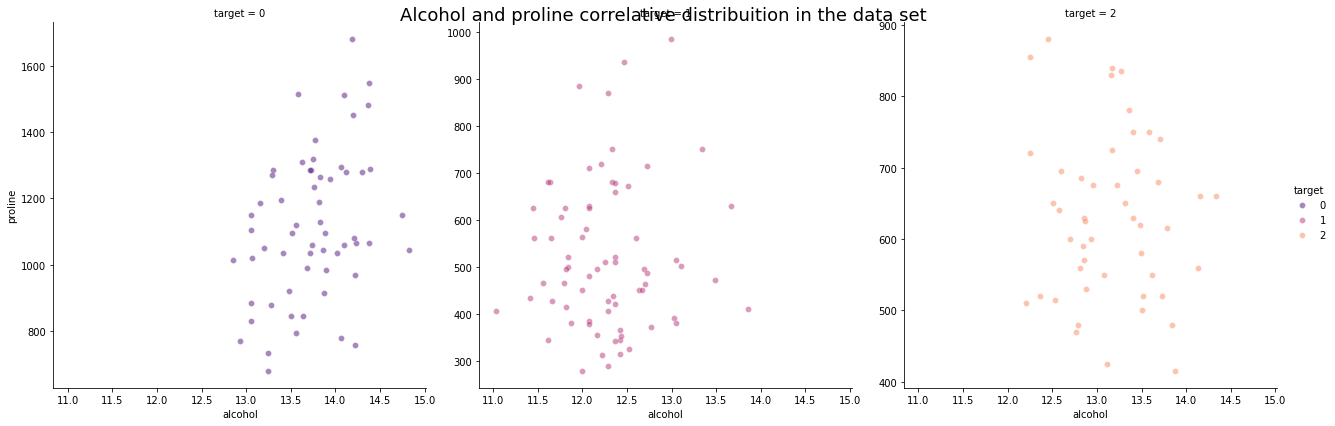

In [31]:
# checking alcohol and proline correlation
g = sns.FacetGrid(wines , col="target", sharey = False , hue = 'target', palette = 'magma', height = 6);
g.map_dataframe(sns.scatterplot, x="alcohol", y="proline", alpha=0.5);
g.fig.suptitle('Alcohol and proline correlative distribuition in the data set', fontsize = 18)
g.add_legend();

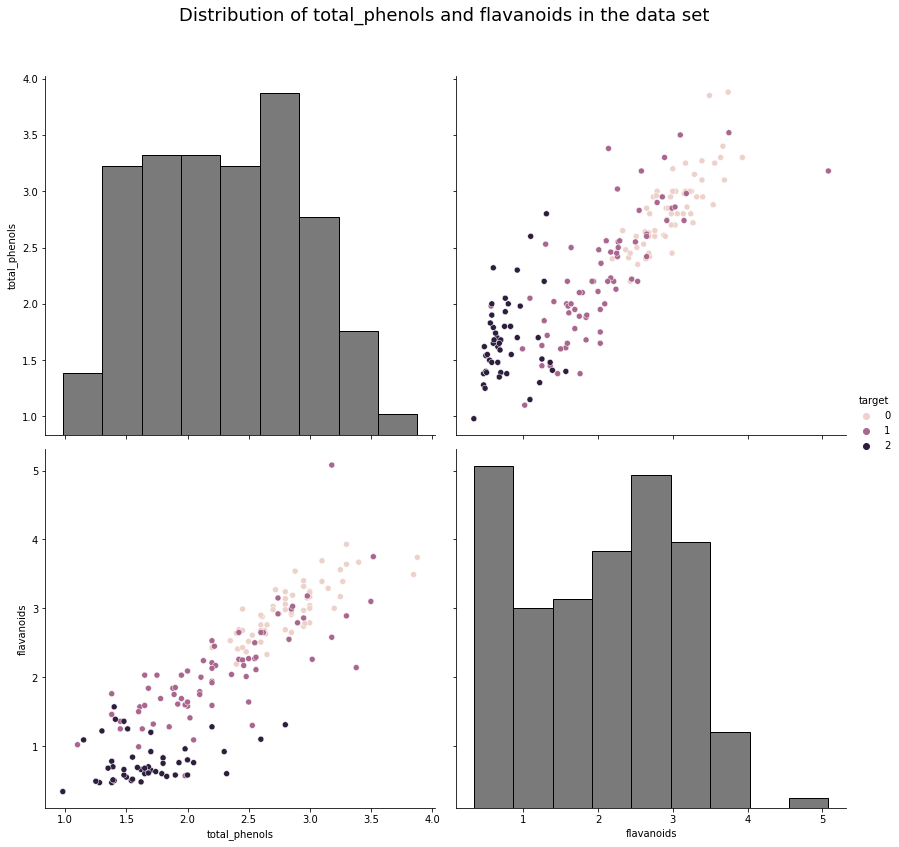

In [32]:
# checking the distribution of total_phenols and flavanoids in our data set
variables = ["total_phenols", "flavanoids"]
g = sns.PairGrid(wines, hue="target", vars=variables, diag_sharey=False ,   height = 6)
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_offdiag(sns.scatterplot)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of total_phenols and flavanoids in the data set', fontsize = 18);
g.add_legend()

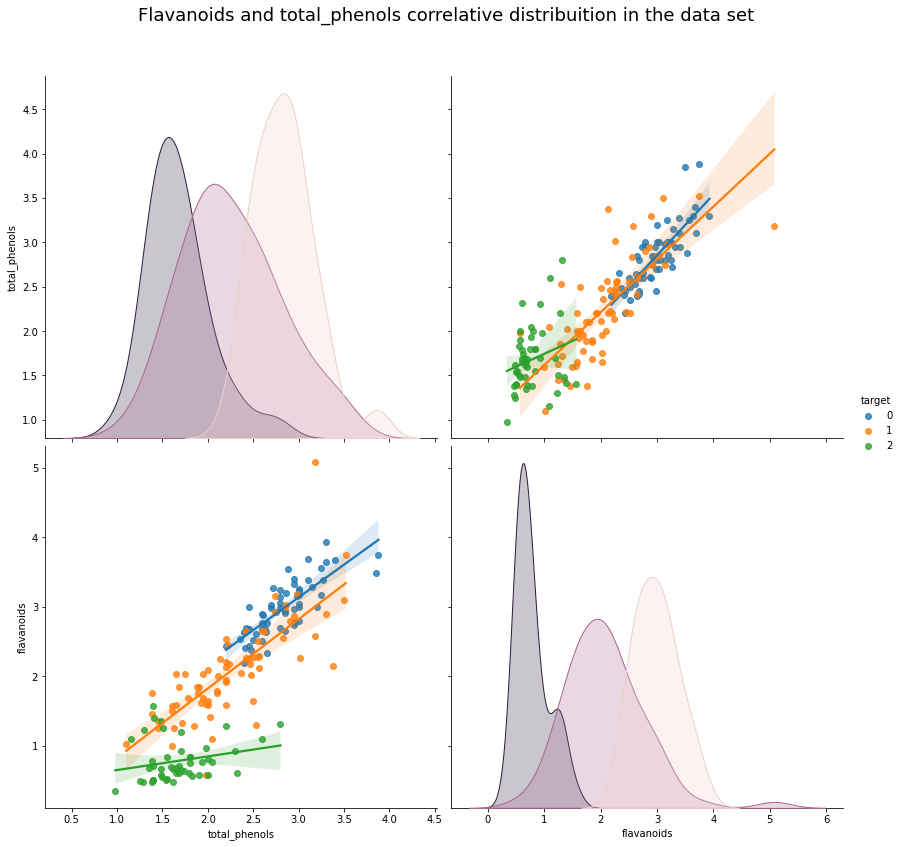

In [33]:
# checkingn total_phenols	flavanoids correlation
g = sns.pairplot(wines, hue = 'target', kind = 'reg', vars = ['total_phenols', 'flavanoids'], height = 6);
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Flavanoids and total_phenols correlative distribuition in the data set', fontsize = 18);

---

In [8]:
# Split data into training and validation sets
X = wines.drop(['target'], axis = 1)
y = wines['target']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((142, 13), (36, 13), (142,), (36,))

In [11]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_valid, y_train, y_valid):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_valid : validation data
    y_train : labels assosciated with training data
    y_valid : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(0)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_valid, y_valid)
    return model_scores

In [13]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_valid=X_valid,
                             y_train=y_train,
                             y_valid=y_valid)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'KNN': 0.8055555555555556,
 'Logistic Regression': 0.9166666666666666,
 'Random Forest': 0.9722222222222222}

## **Model Comparison**

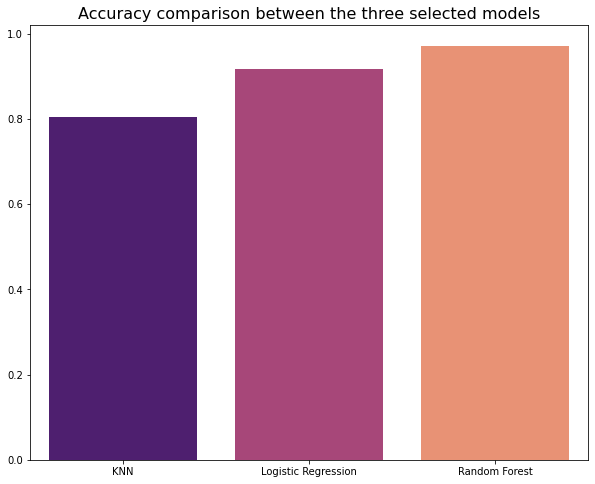

In [34]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])

# simple bar graph comparison
plt.figure(figsize = (10,8))
sns.barplot(data = model_compare, palette = 'magma');
plt.title('Accuracy comparison between the three selected models', fontsize = 16);

## **Hyperparameter Tuning and Cross-Validation**

For practical cases we coul simple use de **RandomForest** model due hiw better accuracy performance, but let's modify some **Hyperparameter** from all the three models and see the results.

**Note**: This is only a study case, so we don't need a perfect model using all **HyperParameters**.

In [15]:
# Different KNN Hyperparameters
knn_grid = {'n_neighbors': np.arange(5,100,10),
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto','kd_tree', 'ball_tree']}

# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "class_weight": ['dict', 'balanced', None],
                "solver": ['liblinear', 'lbfgs', 'saga']}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_leaf": np.arange(1, 20, 2)}

In [18]:
# Setup random seed
np.random.seed(0)

# Setup grid hyperparameter search for KNN
gs_knn = GridSearchCV(KNeighborsClassifier(),
                          param_grid=knn_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_knn.fit(X_train, y_train);

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [19]:
# Check the best parameters
gs_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 75, 'weights': 'distance'}

In [ ]:
# Setup random seed
np.random.seed(0)

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

In [21]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'class_weight': 'balanced', 'solver': 'liblinear'}

In [22]:
# Setup random seed
np.random.seed(0)

# Setup grid hyperparameter search for RandomForest
gs_rf = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


In [23]:
# Check the best parameters
gs_rf.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 110}

---

## **Evaluating a Classification Model**

Evaluations parameters:

* **ROC curve and AUC score** - `plot_roc_curve()`
* **Confusion Matrix** - `confusion_matrix()`
* **Accuracy** - `accuracy_score()`
* **Precision** - `precision_score()`
* **Recall** - `recall_score()`
* **F1-score** - `f1_score()`

In [42]:
def evaluate_preds(y_true, y_preds):
  """
  Performs evaluation comparison on y_true labels vs. y_pred labels
  on a classification.
  """
  accuracy = accuracy_score(y_true, y_preds)
  precision = precision_score(y_true, y_preds, average = 'micro')
  recall = recall_score(y_true, y_preds, average = 'micro')
  f1 = f1_score(y_true, y_preds, average = 'micro')
  metric_dict = {"accuracy": accuracy,
                  "precision": precision,
                  "recall": recall,
                  "f1": f1}
  print(f"Acc: {accuracy * 100:.2f}%")
  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"F1 score: {f1:.2f}")

  return metric_dict

In [43]:
# Make predictions using the previous models after changing some hyperparameters on Validation Data
y_preds_knn = gs_knn.predict(X_valid)
y_preds_log_reg = gs_log_reg.predict(X_valid)
y_preds_rf = gs_rf.predict(X_valid)

In [44]:
# evaluating KNN model
knn_score = evaluate_preds(y_valid, y_preds_knn)

Acc: 77.78%
Precision: 0.78
Recall: 0.78
F1 score: 0.78


In [45]:
# evaluating LogisticRegression model
log_reg_score = evaluate_preds(y_valid, y_preds_log_reg)

Acc: 94.44%
Precision: 0.94
Recall: 0.94
F1 score: 0.94


In [46]:
# evaluating  RandomForestClassifier
rg_score = evaluate_preds(y_valid, y_preds_rf)

Acc: 97.22%
Precision: 0.97
Recall: 0.97
F1 score: 0.97


In [47]:
# evaluating our oldest models before we change any hyperparameter
baseline_models = models.values()
models = [model for model in baseline_models]

In [48]:
# Making predictions

y_pred_old_knn = models[0].predict(X_valid)
y_pred_old_log_reg = models[1].predict(X_valid)
y_pred_old_rf = models[1].predict(X_valid)

In [49]:
# evaluating KNN model
old_knn_score = evaluate_preds(y_valid, y_pred_old_knn)

Acc: 80.56%
Precision: 0.81
Recall: 0.81
F1 score: 0.81


In [50]:
# evaluating LogisticRegression model
old_log_reg_score = evaluate_preds(y_valid, y_pred_old_log_reg)

Acc: 91.67%
Precision: 0.92
Recall: 0.92
F1 score: 0.92


In [51]:
# evaluating  RandomForestClassifier
old_rg_score = evaluate_preds(y_valid, y_pred_old_rf)

Acc: 91.67%
Precision: 0.92
Recall: 0.92
F1 score: 0.92


In [53]:
data = [old_knn_score.values() ,old_log_reg_score.values(),  old_rg_score.values(), knn_score.values() ,log_reg_score.values(),  rg_score.values()]

cv_metrics = pd.DataFrame(data, columns = ['accuracy', 'precision', 'recall', 'f1'])
cv_metrics['model'] = ['KNN', 'LogisticRegression', 'RandomForestClassifier', 'KNN', 'LogisticRegression', 'RandomForestClassifier']
cv_metrics

,accuracy,precision,recall,f1,model
0,0.805556,0.805556,0.805556,0.805556,KNN
1,0.916667,0.916667,0.916667,0.916667,LogisticRegression
2,0.916667,0.916667,0.916667,0.916667,RandomForestClassifier
3,0.777778,0.777778,0.777778,0.777778,KNN
4,0.944444,0.944444,0.944444,0.944444,LogisticRegression
5,0.972222,0.972222,0.972222,0.972222,RandomForestClassifier


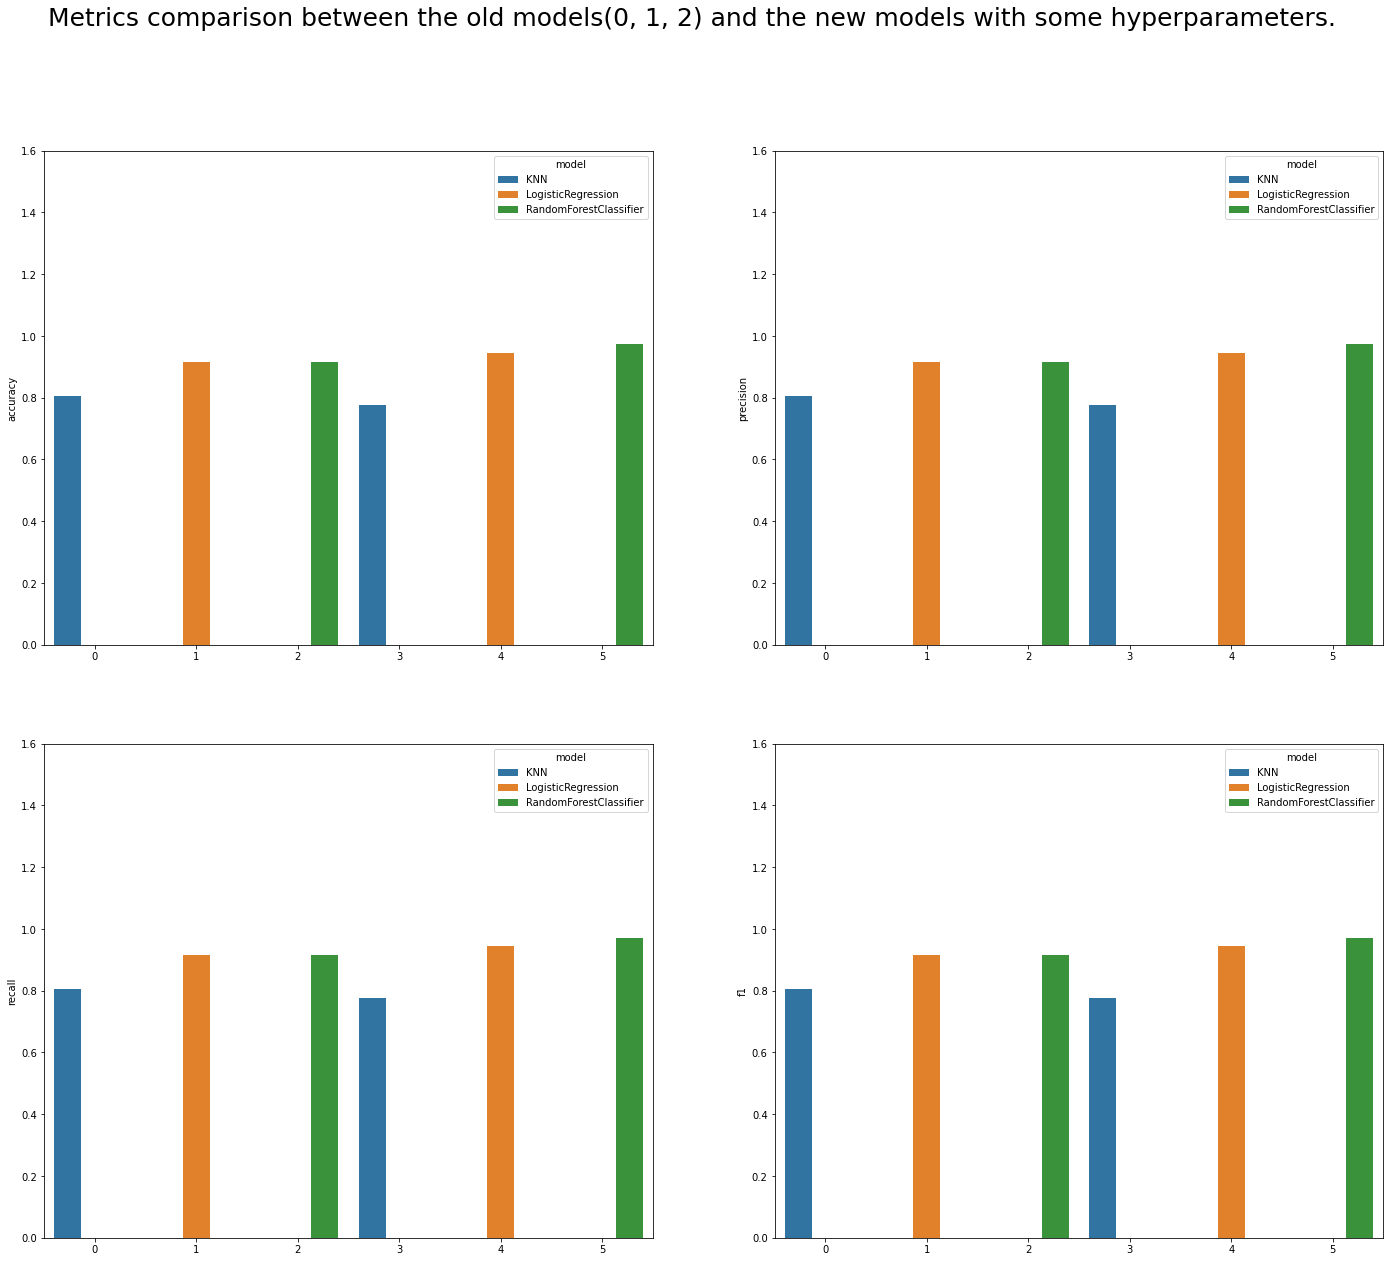

In [54]:
fig, axs = plt.subplots(nrows = 2 , ncols = 2, figsize = (24,20))

fig.suptitle('Metrics comparison between the old models(0, 1, 2) and the new models with some hyperparameters.', fontsize=25)

sns.barplot(x = cv_metrics.index, y = "accuracy", hue = "model", ci = "sd",capsize = 0.09, data = cv_metrics, ax = axs[0][0]);
axs[0][0].set(ylim = (0, 1.6));

sns.barplot(x = cv_metrics.index, y = "precision", hue = "model", ci = "sd", capsize = 0.09, data = cv_metrics, ax = axs[0][1]);
axs[0][1].set(ylim = (0, 1.6));

sns.barplot(x = cv_metrics.index, y = "recall", hue = "model", ci = "sd", capsize = 0.09, data = cv_metrics, ax = axs[1][0]);
axs[1][0].set(ylim = (0, 1.6));

sns.barplot(x = cv_metrics.index, y = "f1", hue = "model", ci = "sd", capsize = 0.09, data = cv_metrics, ax = axs[1][1]);
axs[1][1].set(ylim = (0, 1.6));



---

## **Confusion Matrix**

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using confusion_matrix() and passing it the true labels and predicted labels.

In [59]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True,  cbar=False)
    sns.set(font_scale=2.0)
    plt.xlabel("true label")
    plt.ylabel("predicted label")

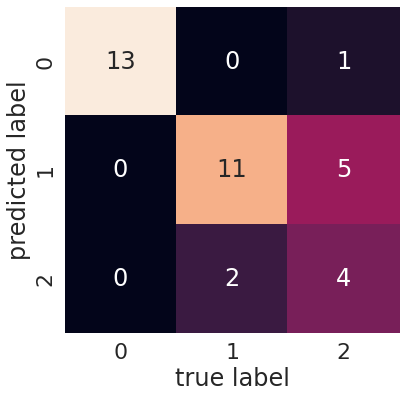

In [60]:
# KNN Model Confusion Matrix
plot_conf_mat(y_valid, y_preds_knn)

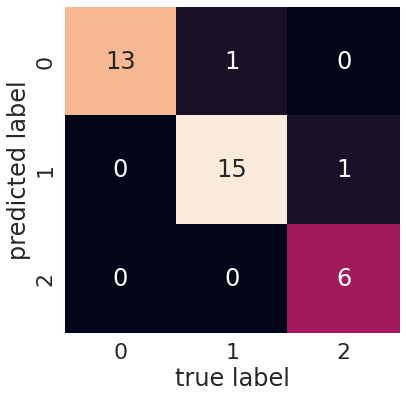

In [61]:
## LogisticRegression Model Confusion Matrix
plot_conf_mat(y_valid, y_preds_log_reg)

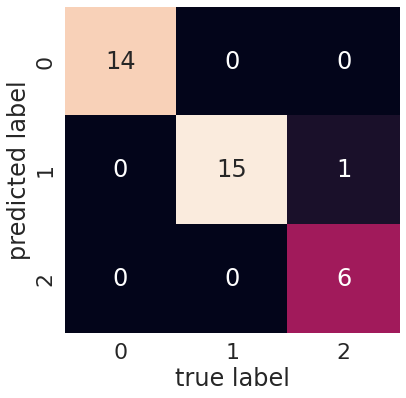

In [62]:
# RandomForestClassifier Model Confusion Matrix
plot_conf_mat(y_valid, y_preds_rf)

---

## **Classification Report**

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).


### **Classification Report using ` classification_report()` Method**

In [63]:
from sklearn.metrics import classification_report

In [64]:
# KNN Model classification report using classification_report() method
knn = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 5, weights = 'distance' )
print(classification_report(y_valid, y_preds_knn))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.85      0.69      0.76        16
           2       0.40      0.67      0.50         6

    accuracy                           0.78        36
   macro avg       0.75      0.76      0.74        36
weighted avg       0.83      0.78      0.79        36



In [65]:
# RandomForestClassifier Model classification report using classification_report() method
rf = RandomForestClassifier(max_depth  = None, min_samples_leaf = 1, n_estimators = 110)
print(classification_report(y_valid, y_preds_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.96        36
weighted avg       0.98      0.97      0.97        36



In [66]:
# LogisticRegression Model classification report using classification_report() method
clf = LogisticRegression(C = 0.23357214690901212,class_weight = 'balanced', solver="liblinear")
print(classification_report(y_valid, y_preds_log_reg))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.94      0.94      0.94        16
           2       0.86      1.00      0.92         6

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.94        36



### **Classification Report Using the `scoring` Parameter**



In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
np.random.seed(0)
def scoring_classification_report(model):
  cv_acc  = np.mean(cross_val_score(model, X, y, cv=5, scoring="accuracy"))
  cv_prec = np.mean(cross_val_score(model, X, y, cv=5, scoring="precision_micro"))
  cv_rec  = np.mean(cross_val_score(model, X, y, cv=5, scoring="recall_micro"))
  cv_f1   = np.mean(cross_val_score(model, X, y, cv=5, scoring="f1_micro"))

  cv_report = pd.DataFrame({'Accuracy': cv_acc, 'Precision': cv_prec, 'Recall': cv_rec, 'F1': cv_f1}, index = [0])

  return cv_report

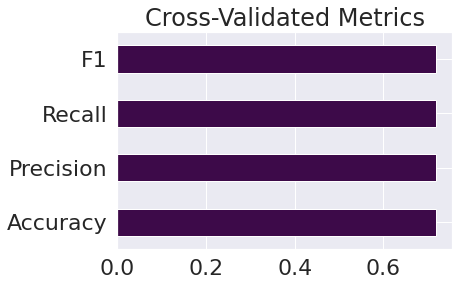

In [69]:
# KNN Model classification report using scoring parameters
cv_metrics = scoring_classification_report(knn)
cv_metrics.T.plot.barh(title="Cross-Validated Metrics", legend=False, color = '#3d0a49');

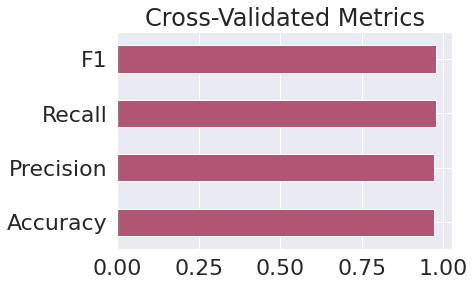

In [70]:
# RandomForestClassifier Model classification report using scoring parameters
cv_metrics = scoring_classification_report(rf)
cv_metrics.T.plot.barh(title="Cross-Validated Metrics", legend=False, color = '#b05574');

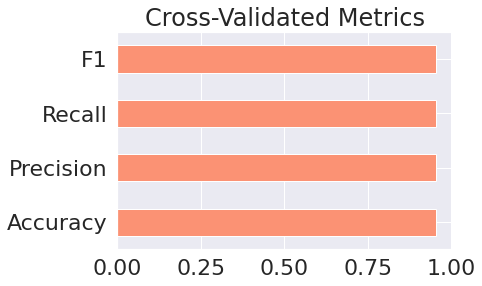

In [71]:
# LogisticRegression Model classification report using scoring parameters
cv_metrics = scoring_classification_report(clf)
cv_metrics.T.plot.barh(title="Cross-Validated Metrics", legend=False, color = '#fb9274');

---

## **Feature importance**

Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

Unlike some of the other functions we've seen, because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.

**The larger the value (bigger bar), the more the feature contributes to the models decision.**

**If the value is negative, it means there's a negative correlation. And vice versa for positive values.**

In [6]:
clf = LogisticRegression(C= 0.615848211066026, class_weight = 'balanced',  solver="lbfgs")

In [ ]:
# Fit an instance of LogisticRegression (taken from above)
np.random.seed(0)
clf.fit(X_train, y_train);

In [25]:
# Check coef_
clf.coef_

array([[ 0.01047667,  0.24822238,  0.15186242, -0.26167133, -0.03943801,
         0.20858447,  0.51116554, -0.02095656,  0.0928487 ,  0.04526519,
         0.00281244,  0.39445177,  0.00766692],
       [ 0.34931803, -0.64401877, -0.15890935,  0.15396273,  0.01340429,
         0.18414433,  0.32600217,  0.00758671,  0.3125133 , -1.11816385,
         0.21096278,  0.35132197, -0.00614227],
       [-0.35979471,  0.39579638,  0.00704693,  0.1077086 ,  0.02603373,
        -0.3927288 , -0.83716771,  0.01336985, -0.405362  ,  1.07289866,
        -0.21377522, -0.74577374, -0.00152465]])

In [26]:
# Match features to columns
features_dict = dict(zip(wines.drop(['target'], axis = 1).columns, list(clf.coef_[0])))
features_dict

{'alcohol': 0.010476673744616711,
 'malic_acid': 0.24822238407954542,
 'ash': 0.15186242372005937,
 'alcalinity_of_ash': -0.26167133151889727,
 'magnesium': -0.03943801206076501,
 'total_phenols': 0.20858447045337705,
 'flavanoids': 0.511165541089588,
 'nonflavanoid_phenols': -0.020956559123135935,
 'proanthocyanins': 0.09284869853137599,
 'color_intensity': 0.04526519055898931,
 'hue': 0.002812436693585012,
 'od280/od315_of_diluted_wines': 0.3944517683139512,
 'proline': 0.007666924751363674}

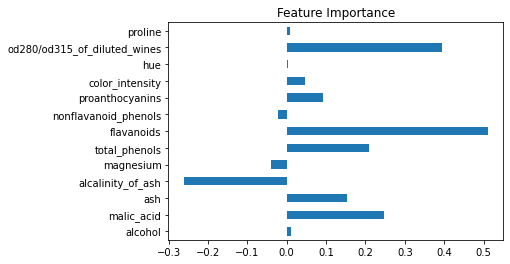

In [41]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.barh(title="Feature Importance", legend=False);

In the **LogisticRegression** Model we can see that the features **ash** and **flavanoids** are the biggest contribution to our model to predict correctly.

#### We can see that the features considerate the most important to our models predict correctly are the same that appeard in the HeatMap we set in the begginning of this Notebook.

#### Besides that, we can have a better understanding of wich features has a deeper impact in each model. 

#### In the three models the positive and negative features are in majority exaclty the same, having only a few variance depeding on how the model works.

## **Comparing Model Prediction**

In this topic we're gonna take a visualy comparison between the expected values showed in the **wines data set** against the predictions made for each model.


In [80]:
def histkde_comparsion_graph(model, y_preds):
  variables = [y_preds, np.array(y_valid)]

  custom = [Line2D([], [], marker='.', color='#536d88', linestyle='None'),
            Line2D([], [], marker='.', color='#ffb884', linestyle='None')]

  fig, axs = plt.subplots(ncols = 2, figsize = (24,12))
  fig.suptitle('A Histogram and KDE graph for comparsion between the actual values and the pred values', fontsize = 18);

  sns.histplot(data = variables, ax = axs[0])
  axs[0].set(title = f'Target distribution comparison ({model} Model)');
  sns.kdeplot(data = variables, shade = True ,ax = axs[1])
  axs[1].set(title = f'Target density comparison ({model} Model)');


  for col in range(2):
    axs[col].legend(custom, [model, 'Iris Data Set', ],loc = 'upper right');


In [72]:
# Comparing the LogisticRegression Model predictions
clf = LogisticRegression(C = 0.23357214690901212,class_weight = 'balanced', solver="liblinear")
clf.fit(X_train, y_train)
clf_preds = clf.predict(X_valid)

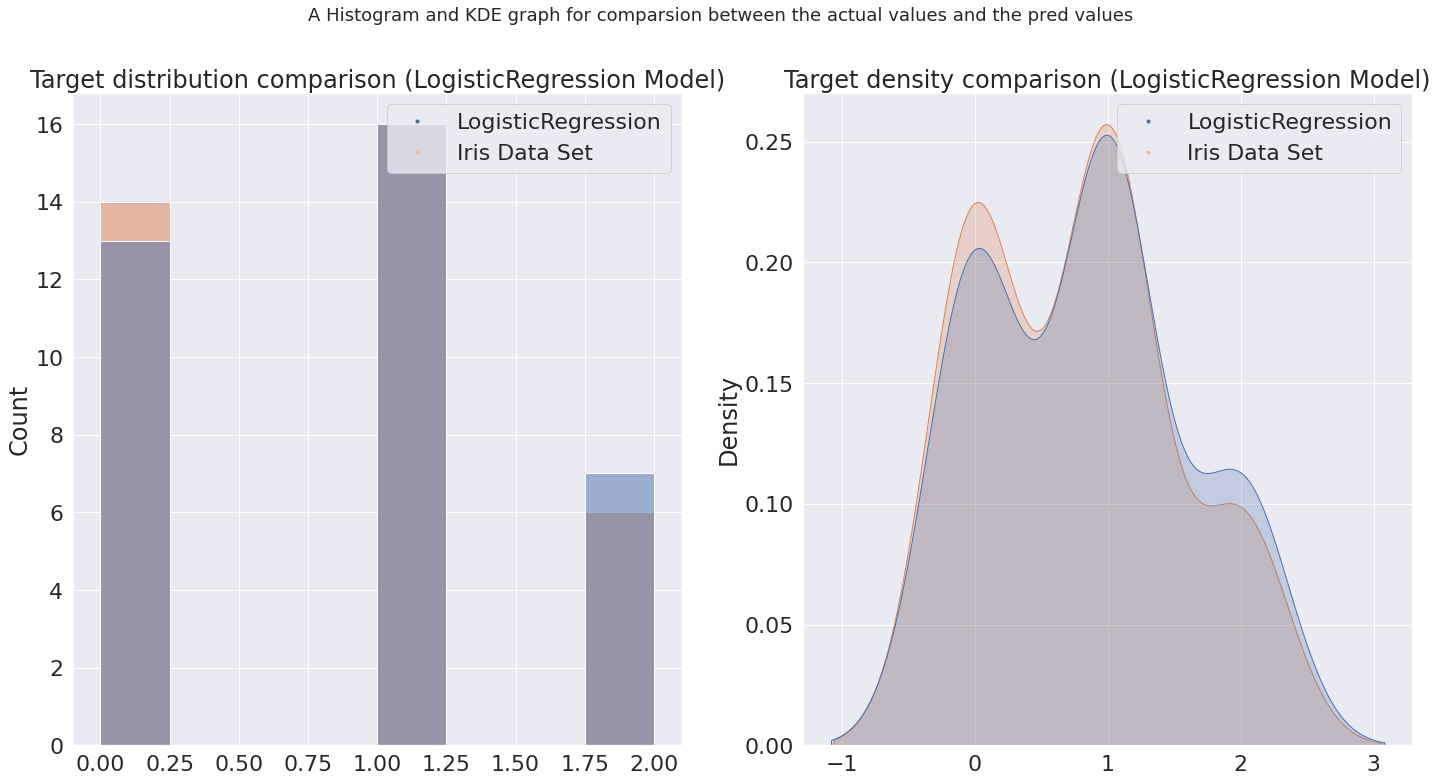

In [81]:
histkde_comparsion_graph('LogisticRegression', clf_preds)

In [74]:
# Comparing the RandomForestClassifier Model predictions
rf = RandomForestClassifier(max_depth  = None, min_samples_leaf = 1, n_estimators = 110)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_valid)

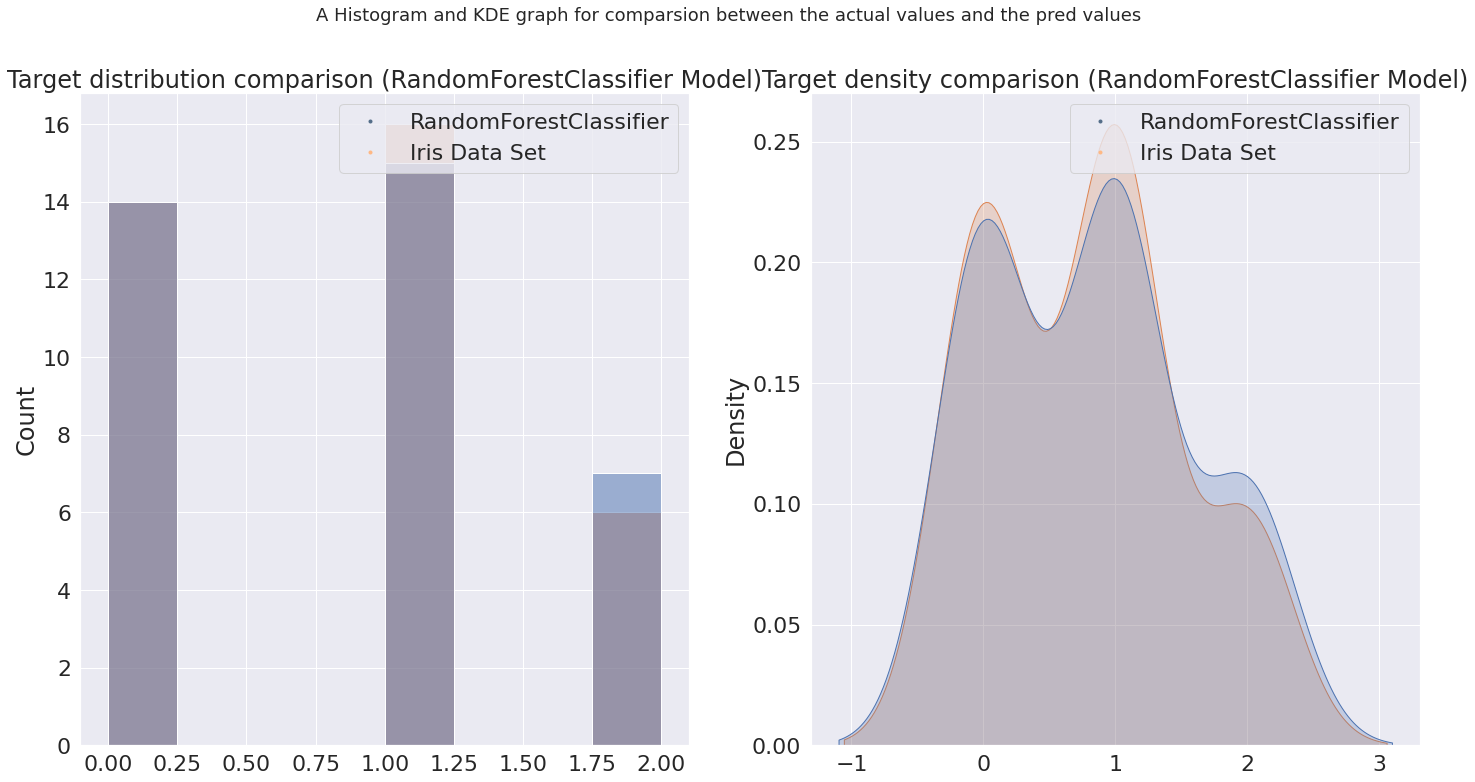

In [82]:
histkde_comparsion_graph('RandomForestClassifier', rf_preds)

In [78]:
# Comparing the KNeighborsClassifier Model predictions
knn = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 5, weights = 'distance' )
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_valid)

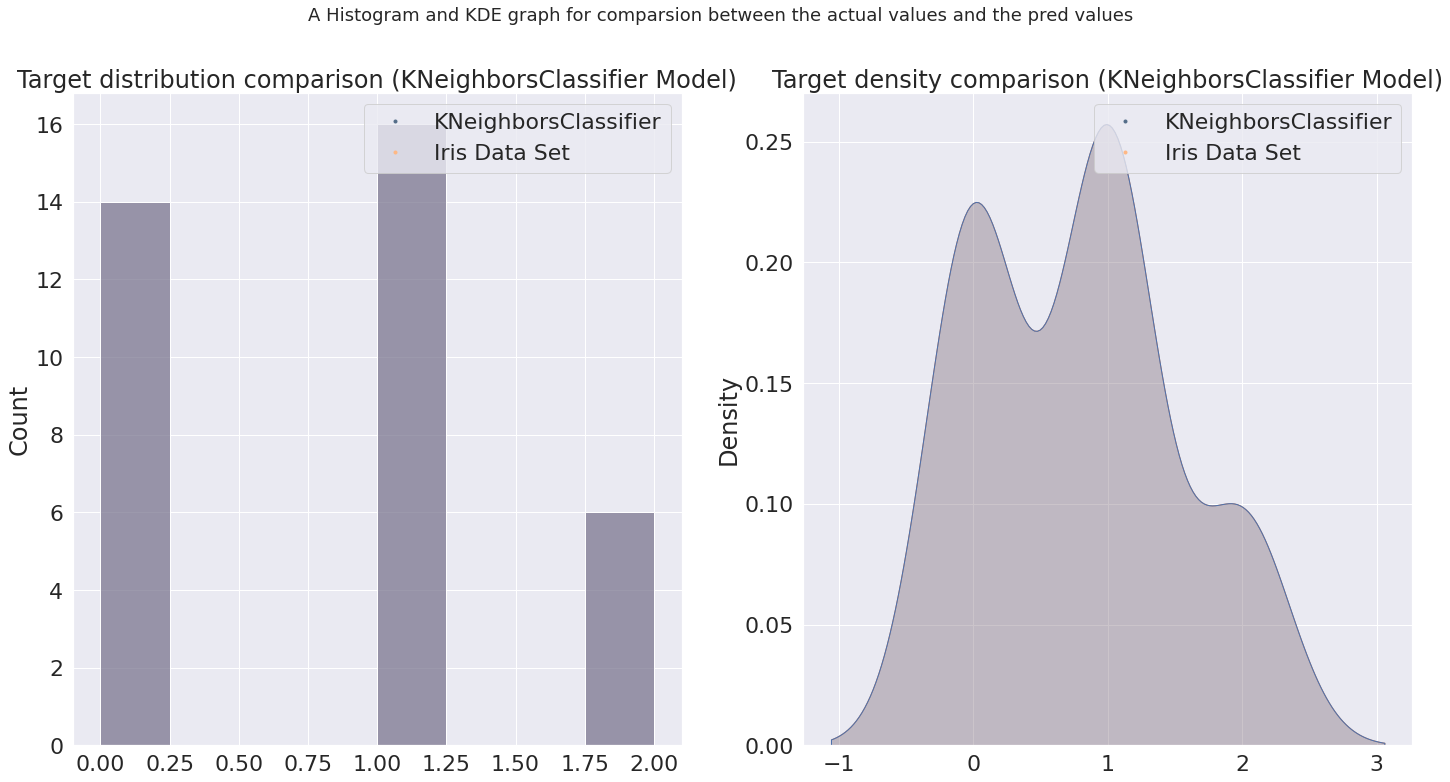

In [83]:
histkde_comparsion_graph('KNeighborsClassifier', knn_preds)